# Clasificación multiclase con redes neuronales en Keras
___

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical

In [2]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## Importar Dataset

In [3]:
#https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Explorar el dataset

#### Conjunto de entrenamiento

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
y_train_full.shape

(60000,)

#### Conjunto de prueba

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

#### Visualizando una instancia

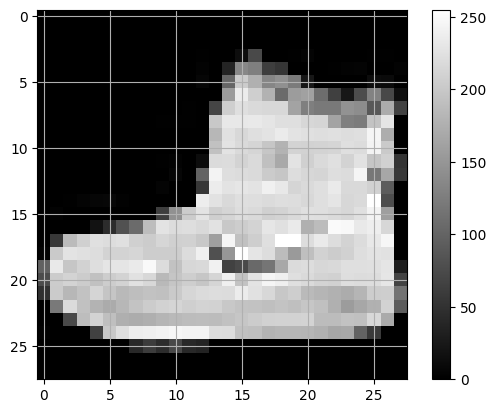

In [8]:
# Visualizar la imagen en escala de grises
plt.figure()
plt.imshow(X_train_full[0], cmap='gray')
plt.colorbar()
plt.grid(True)
plt.show()

#### Clases

In [9]:
y_train_full[0]

9

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train_full[0]]

'Ankle boot'

#### Visualizando las primeras 25 instancias

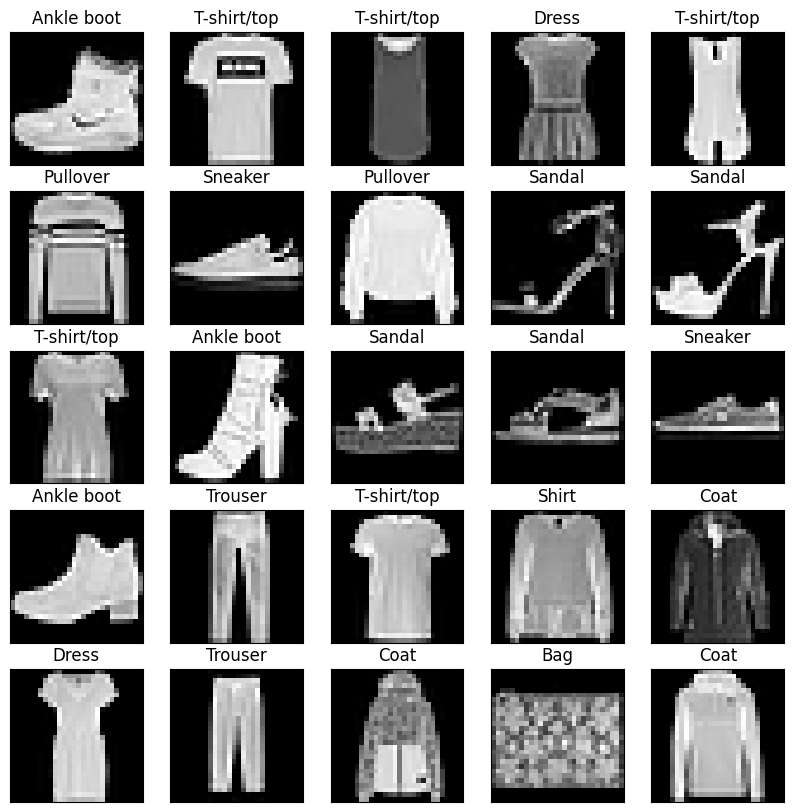

In [12]:
plt.figure(figsize=(10,10))
for i in range(0,25):
    plt.subplot(5,5, i+1)
    plt.imshow(X_train_full[i], cmap='gray')
    plt.title(class_names[(y_train_full[i])])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.show()

## Preprocesamiento

#### Escalamiento de características

In [13]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [14]:
X_train_full = X_train_full / 255
X_test = X_test / 255

In [15]:
X_train_full[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Crear conjunto de validación

In [16]:
# Separar el conjunto de entrenamiento completo en validación y entrenamiento
X_train = X_train_full[:55000]
y_train = y_train_full[:55000]

X_validation = X_train_full[55000:]
y_validation = y_train_full[55000:]

In [17]:
X_validation.shape

(5000, 28, 28)

In [18]:
X_train.shape

(55000, 28, 28)

# Modelo

#### Crear el modelo y añadir capas

In [19]:
from tensorflow.keras import layers
from keras import models

model = keras.models.Sequential()
# Convolutional
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Dense
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

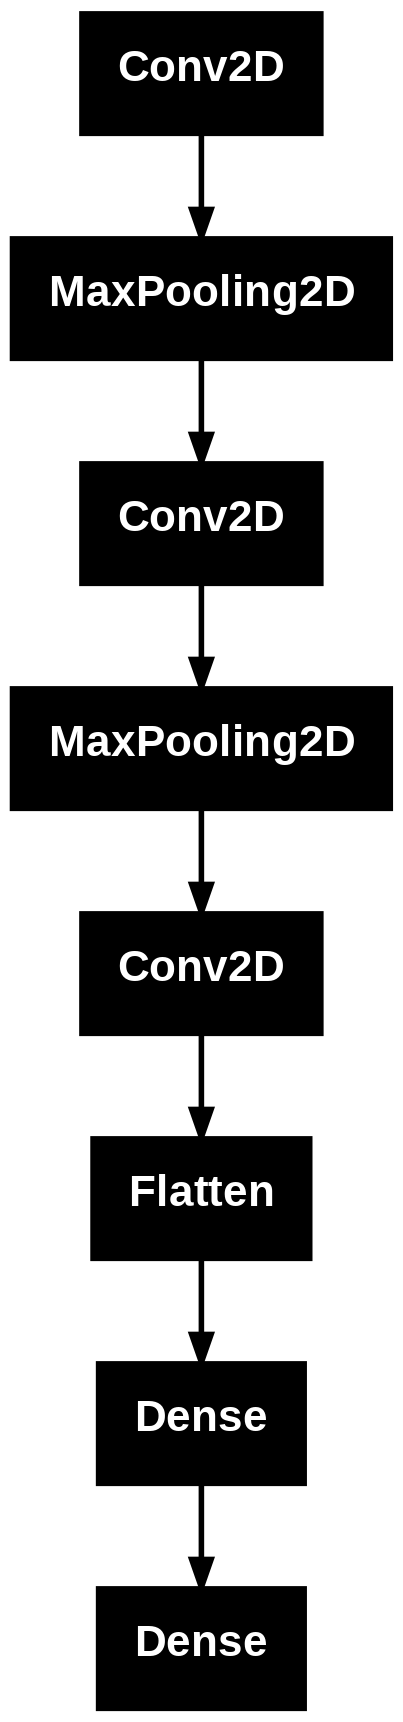

In [21]:
keras.utils.plot_model(model)

In [22]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>]

#### Modelo aumentado para alcanzar 92

In [40]:
model_92 = keras.models.Sequential()
# Convolutional
# Block 1
model_92.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model_92.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model_92.add(layers.MaxPooling2D((2, 2)))
# Block 2
model_92.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_92.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_92.add(layers.MaxPooling2D((2, 2)))
# Block 3
model_92.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_92.add(layers.MaxPooling2D((2, 2)))

# Dense
model_92.add(layers.Flatten())
model_92.add(layers.Dense(128, activation='relu'))
model_92.add(layers.Dropout(0.5))
model_92.add(layers.Dense(10, activation='softmax'))

# Visualize model
model_92.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 287,722 (1.10 MB)

 Trainable params: 287,722 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

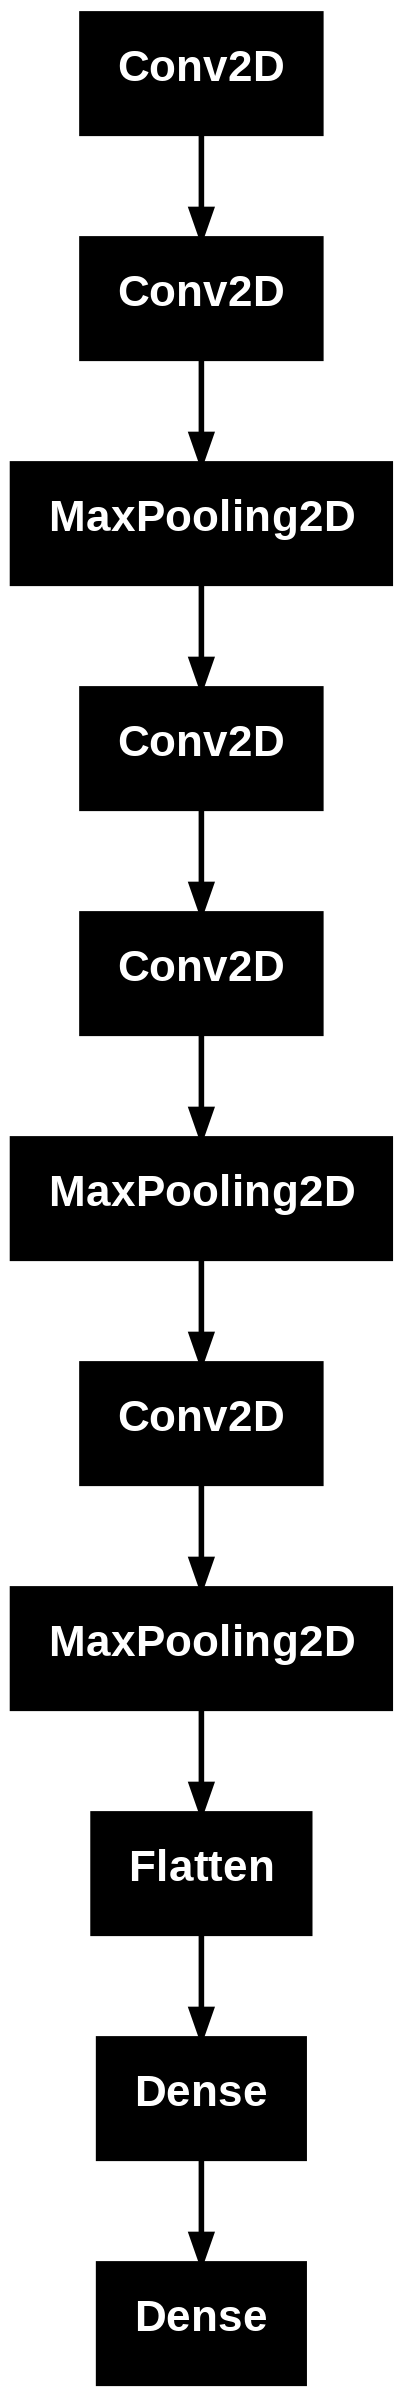

In [28]:
keras.utils.plot_model(model_92)

#### VGG network

In [24]:
# VGG model
model_vgg = models.Sequential()

# Block 1
model_vgg.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model_vgg.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model_vgg.add(layers.MaxPooling2D((2, 2)))

# Block 2
model_vgg.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_vgg.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_vgg.add(layers.MaxPooling2D((2, 2)))

# Block 3
model_vgg.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg.add(layers.MaxPooling2D((2, 2)))

# Fully connected layers
model_vgg.add(layers.Flatten())
model_vgg.add(layers.Dense(256, activation='relu'))
model_vgg.add(layers.Dense(10, activation='softmax'))

# Compile the model
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_vgg.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 584,170 (2.23 MB)

 Trainable params: 584,170 (2.23 MB)

 Non-trainable params: 0 (0.00 B)

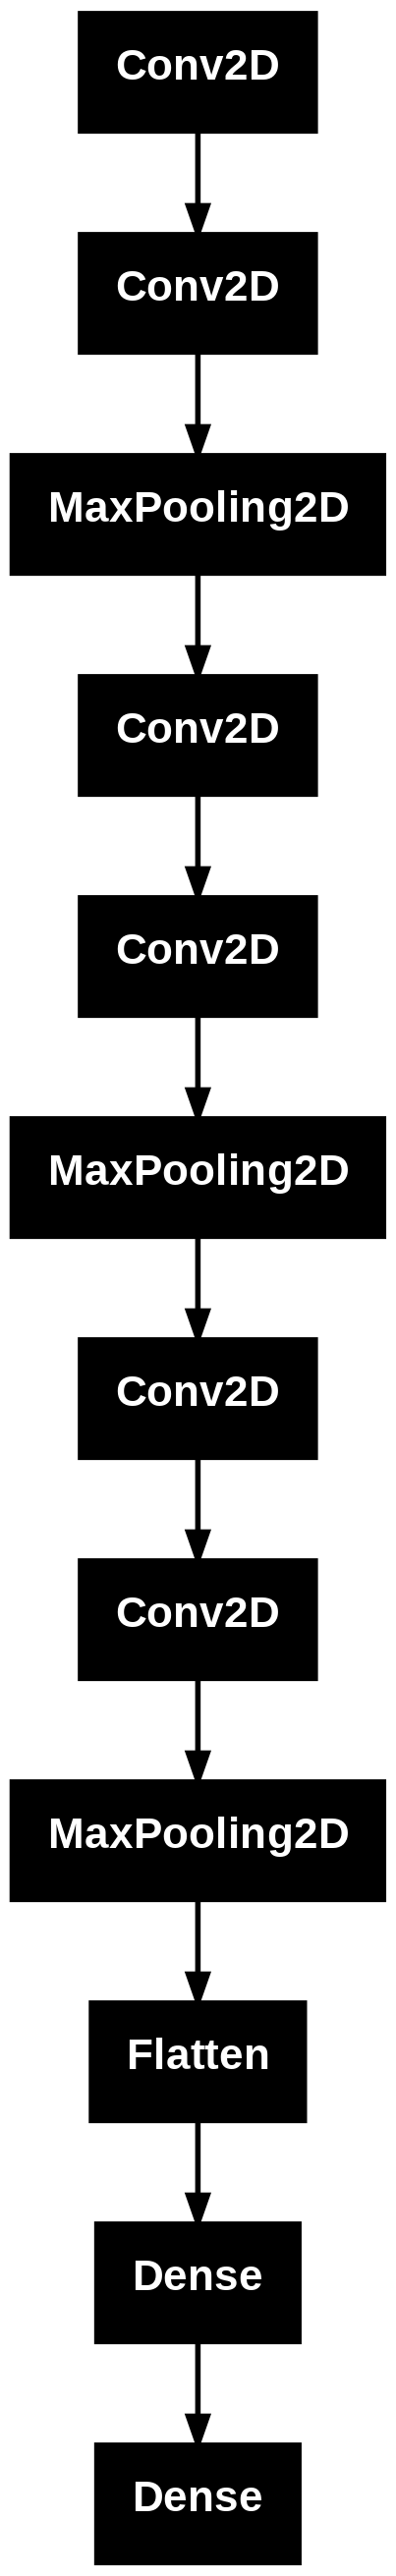

In [29]:
keras.utils.plot_model(model_vgg)

In [30]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_validation = X_validation.reshape((X_validation.shape[0], 28, 28, 1))

In [31]:
train_labels = to_categorical(y_train)
validation_labels = to_categorical(y_validation)
test_labels = to_categorical(y_test)

# Configurar el proceso de aprendizaje (Compilar)
Se especifica:
- Loss function
- Optimizer
- Metrics (Opcional, en caso de querer observar métricas extra durante el entrenamiento o evaluación)

In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [41]:
model_92.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [42]:
model_vgg.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Entrenamiento y evaluación en datos de validación
Los datos de validación son opcionales, pero si los pasamos como parámetros en el método `fit()`, Keras medirá el loss y las demás métricas que le indiquemos sobre el conjunto de validación al final de cada época.

Se pueden pasar como parámetros los datos de validación con `validation_data`. Si se usa `validation_split`, la fracción de datos que indiquemos será usada como validación (se tomarán los datos del final del conjunto y no se usarán en el entrenamiento). `validation_data` sobrescribe `validation_split`.

- Si el performance es mucho mejor en el conjunto de entrenamiento que en el de validación hay ->

In [39]:
history = model.fit(X_train,
                    train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_validation,validation_labels))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8828 - loss: 0.3210 - val_accuracy: 0.8832 - val_loss: 0.3192
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8870 - loss: 0.3136 - val_accuracy: 0.8828 - val_loss: 0.3280
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8928 - loss: 0.2971 - val_accuracy: 0.8772 - val_loss: 0.3260
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8936 - loss: 0.2940 - val_accuracy: 0.8850 - val_loss: 0.3153
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8965 - loss: 0.2834 - val_accuracy: 0.8830 - val_loss: 0.3247
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8999 - loss: 0.2756 - val_accuracy: 0.8742 - val_loss: 0.3432
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9013 - loss: 0.2696 - val_accuracy: 0.8914 - val_loss: 0.2964
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9018 - loss: 0.2653 - 

In [43]:
history_92 = model_92.fit(X_train,
                    train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_validation,validation_labels))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7289 - loss: 0.7404 - val_accuracy: 0.8936 - val_loss: 0.2762
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8871 - loss: 0.3200 - val_accuracy: 0.9094 - val_loss: 0.2518
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9064 - loss: 0.2574 - val_accuracy: 0.9068 - val_loss: 0.2442
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9199 - loss: 0.2280 - val_accuracy: 0.9192 - val_loss: 0.2141
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9258 - loss: 0.2005 - val_accuracy: 0.9256 - val_loss: 0.2054
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9347 - loss: 0.1811 - val_accuracy: 0.9258 - val_loss: 0.2141
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9400 - loss: 0.1650 - val_accuracy: 0.9244 - val_loss: 0.2013
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9429 - loss: 0.15

In [44]:
history_vgg = model_vgg.fit(X_train,
                    train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_validation,validation_labels))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8586 - loss: 0.3816 - val_accuracy: 0.8926 - val_loss: 0.2849
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9004 - loss: 0.2685 - val_accuracy: 0.9012 - val_loss: 0.2594
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9189 - loss: 0.2219 - val_accuracy: 0.9064 - val_loss: 0.2408
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9261 - loss: 0.1961 - val_accuracy: 0.9100 - val_loss: 0.2430
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9366 - loss: 0.1711 - val_accuracy: 0.9140 - val_loss: 0.2420
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9422 - loss: 0.1494 - val_accuracy: 0.9162 - val_loss: 0.2383
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9491 - loss: 0.1323 - val_accuracy: 0.9170 - val_loss: 0.2486
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9558 - loss: 0.11

#### History

Objeto regresado por el método `fit()` que contiene:
- Parámetros de entrenamiento
- La lísta de épocas
- Loss y métricas obtenidas al final de cada época

In [45]:
history.params

{'verbose': 'auto', 'epochs': 10, 'steps': 1719}

In [46]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [47]:
history.history

{'accuracy': [0.8842545747756958,
  0.8886545300483704,
  0.8913999795913696,
  0.8933091163635254,
  0.8959636092185974,
  0.8981999754905701,
  0.901272714138031,
  0.9026363492012024,
  0.9056727290153503,
  0.9074727296829224],
 'loss': [0.31862205266952515,
  0.3091493248939514,
  0.29977738857269287,
  0.2923937141895294,
  0.2844459116458893,
  0.278561532497406,
  0.2700471580028534,
  0.2656925320625305,
  0.25856438279151917,
  0.25410744547843933],
 'val_accuracy': [0.8831999897956848,
  0.8827999830245972,
  0.8772000074386597,
  0.8849999904632568,
  0.8830000162124634,
  0.8741999864578247,
  0.8913999795913696,
  0.8888000249862671,
  0.8906000256538391,
  0.895799994468689],
 'val_loss': [0.31915342807769775,
  0.3279620110988617,
  0.3260418772697449,
  0.31530770659446716,
  0.3246651887893677,
  0.34321129322052,
  0.2964397370815277,
  0.29534852504730225,
  0.29507380723953247,
  0.2886580228805542]}

#### Curvas de aprendizaje

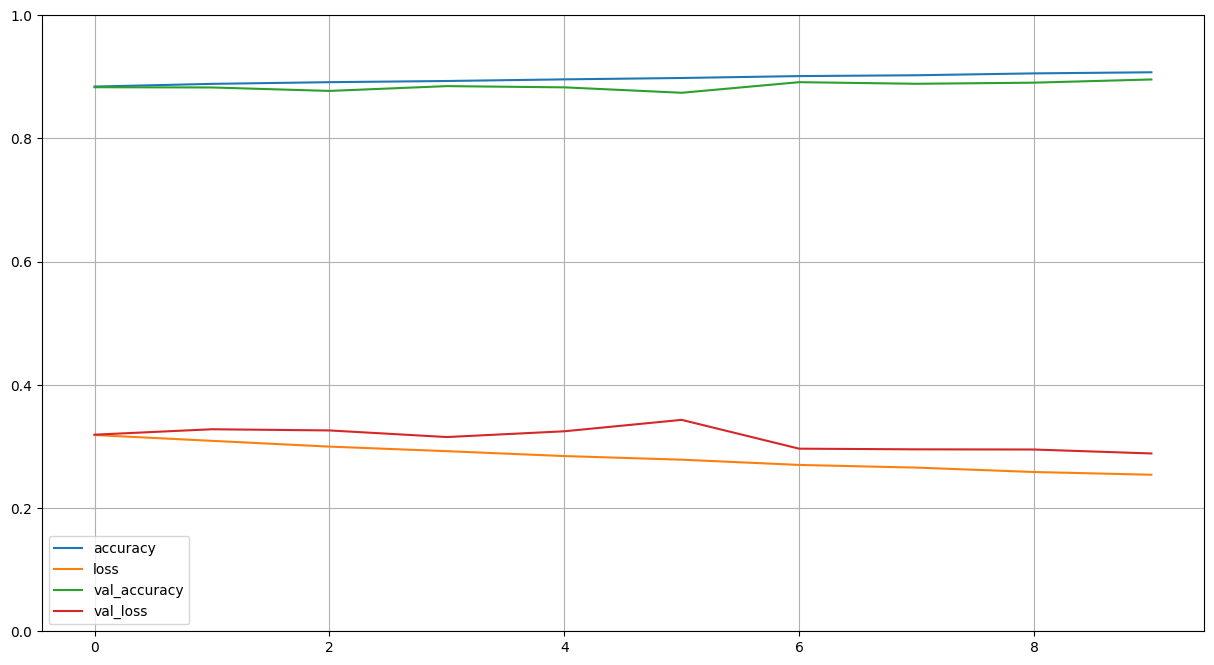

In [48]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

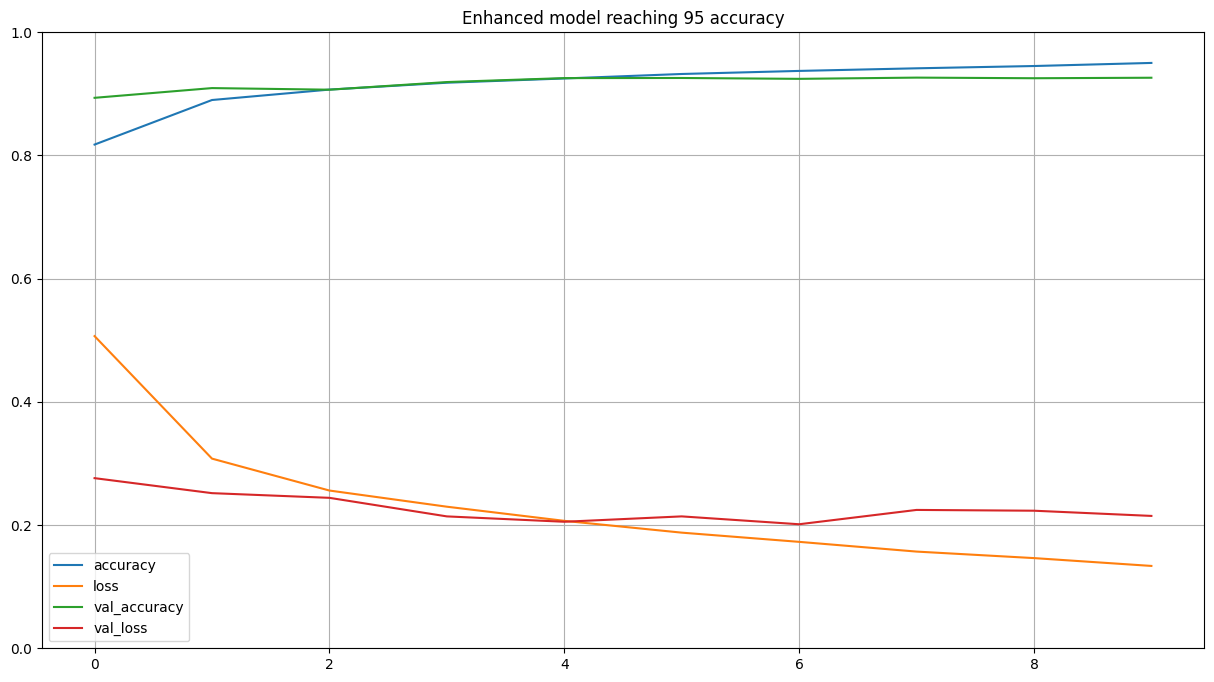

In [51]:
pd.DataFrame(history_92.history).plot(figsize=(15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title("Enhanced model reaching 95 accuracy")
plt.show()

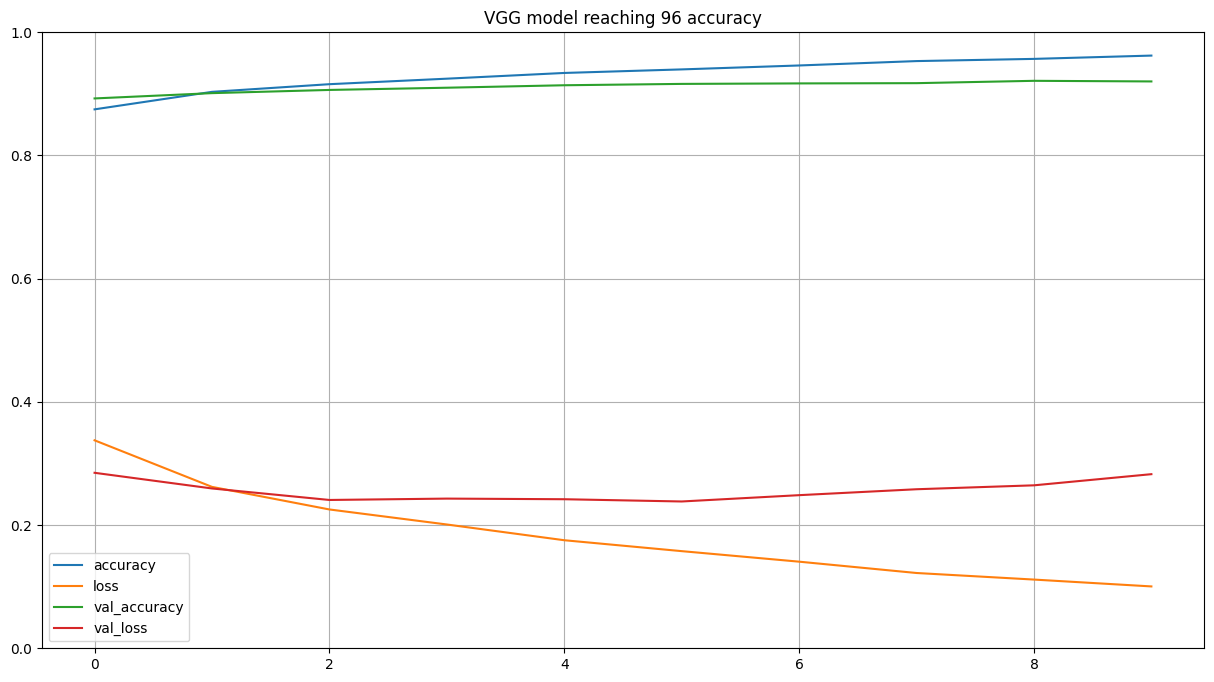

In [52]:
pd.DataFrame(history_vgg.history).plot(figsize=(15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title("VGG model reaching 96 accuracy")
plt.show()

In [54]:
#Si quisiéramos seguir entrenando usando nuestro conjunto de validación
history2 = model.fit(X_train,
                     train_labels,
                     epochs=15,
                     batch_size=32,
                     validation_data=(X_validation,validation_labels),
                     initial_epoch= 10)

Epoch 11/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9081 - loss: 0.2493 - val_accuracy: 0.8964 - val_loss: 0.2929
Epoch 12/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9132 - loss: 0.2392 - val_accuracy: 0.8810 - val_loss: 0.3117
Epoch 13/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9109 - loss: 0.2376 - val_accuracy: 0.8986 - val_loss: 0.2792
Epoch 14/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9138 - loss: 0.2320 - val_accuracy: 0.8998 - val_loss: 0.2785
Epoch 15/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9148 - loss: 0.2315 - val_accuracy: 0.8936 - val_loss: 0.2886


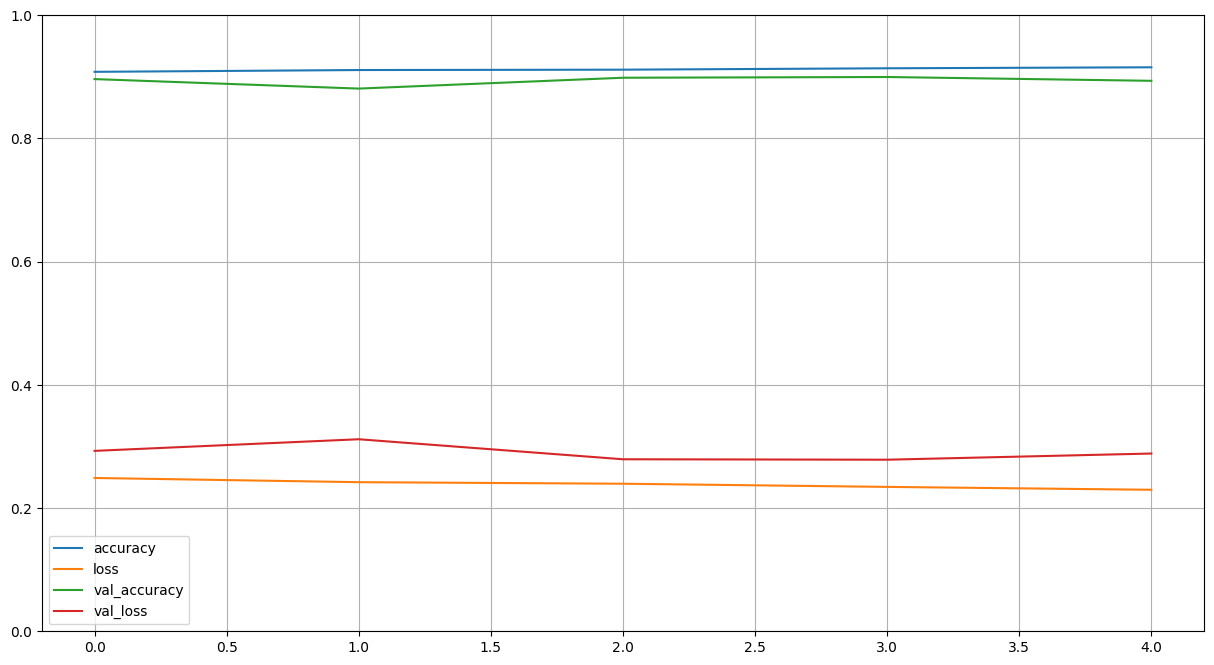

In [55]:
#Si quisiéramos ver las curvas de aprendizaje de un segundo entrenamiento
pd.DataFrame(history2.history).plot(figsize=(15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluación en conjunto de prueba

Estimamos el error de generalización.

In [53]:
loss_and_metrics = model.evaluate(X_test, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8921 - loss: 0.3165


In [56]:
loss_and_metrics_92 = model_92.evaluate(X_test, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9190 - loss: 0.2601


In [57]:
loss_and_metrics_vgg = model_vgg.evaluate(X_test, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9182 - loss: 0.2767


# Predicción en nuevos datos

In [58]:
X_new = X_test[:10]

#### Probabilidad estimada por clase

In [59]:
y_proba = model.predict(X_new).round(2)
y_proba

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.21, 0.  , 0.02, 0.01, 0.01, 0.  , 0.76, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , 0.  , 0.86, 0.  , 0.13, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.96, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

In [60]:
# Convertir probabilidades en clases (el índice de la clase con mayor probabilidad)
y_pred = np.argmax(y_proba, axis=1)

print(y_pred)

[9 2 1 1 6 1 4 6 5 7]


#### Clase con mayor probabilidad

In [61]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Shirt', 'Sandal', 'Sneaker'], dtype='<U11')

In [62]:
print(y_test[:10])

[9 2 1 1 6 1 4 6 5 7]


# Guardar y restaurar el modelo

#### Guardar modelo

In [68]:
model.save('keras_fashion.keras') #En formato HDF5
model_92.save('keras_fashion_92.keras')

#### Restaurar un modelo

In [66]:
model = keras.models.load_model('keras_fashion.keras')

In [65]:
X_new = X_test[:5] # pretend these are new instances
y_pred = model.predict(X_new)
y_pred.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.21, 0.  , 0.02, 0.01, 0.01, 0.  , 0.76, 0.  , 0.  , 0.  ]],
      dtype=float32)

1. Modifica el modelo par alcanzar un accuracy mayor al 92% pero evitando que suceda el sobreajuste.
2. En lugar de la red personalizada, utiliza un arquitectura de red más compleja como ResNet o VGG.